[Day 1 afternoon **_"Python crash course part 4"_**]

**Attribution**  
The material in this notebook is based on  

"[python-in-a-notebook](https://github.com/leriomaggio/python-in-a-notebook)"  
by **Valerio Maggio**  
  licensed under [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)
  
The original material has been modified and adapted.

<a name='functions'></a>Functions and Libraries
===

<a name="top"></a>Outline
---

* [Functions](#functions)
  * [Function syntax](#syntax)
  * [Example functions](#examples)
  * [Namespaces](#namespaces)
  * [Positional arguments](#positional)
  * [Default arguments](#default)
  * [Keyword arguments](#keyword)
  * [Advantages of functions](#advantages)
* [The Python Standard Library](#builtin)
  * [What are built-in functions?](#what)
  * [Importing modules](#import)
  * [Some helpful built-in examples](#builtin examples)
* [Third party libraries](#third party)
  * [NumPy](#numpy)
  * [pandas](#pandas)
  * [Matplotlib](#matplotlib)
  * [scikit-learn and TensorFlow](#learn)
* [Exercise 06: Functions and Libraries](#exercise06)

**Learning goals:** By the end or this lecture you will
* know how to avoid writing repetitive code by using functions
* know how to use existing functions from the Python standard library
* know how to import third party libraries and use their functions
* know a bit about the third party libraries we are going to use in the course

<a name="functions"></a>Functions
===

<a name="syntax"></a>Function syntax
---

##### Defining functions

* Functions are a defined set of actions with a specific name.
* Functions can take variables as _arguments_ and manipulate them.
* Functions can _return_ variables as output to the rest of the program.
* Functions are defined using the keyword **def**.

NOTE: we have already used a lot of functions (**len()**, **min()** etc.)

In [25]:
# the syntax of defining a function

# we call the definition the "function header"
def function_name(argument_1, argument_2):
    # do something with argument_1 and argument_2
    return_value = argument_1*argument_2

    # return the value to be used by the rest of the code
    return return_value

##### Calling functions

* Functions are _called_ using the syntax ```function(argument)```.
* Functions do not necessarily need an argument (they can for example only print a message).
* Multiple arguments are separated by commas when calling the function.

In [83]:
# the syntax of calling a function
new_value = function_name(5, 6)
print(new_value)

30


[top](#top)

<a name="examples"></a>Example functions
---

In [12]:
# a function that returns the cube of the argument
def cube(number):
    number = number*number*number
    return number

number = 10
number = cube(number)
print(number)

1000


In [19]:
# a function that could write email texts
def print_greeting(person):
    print('Dear Prof {},\nI would like to do a PhD with you.\n'\
          .format(person))
    
print_greeting('Mazza')
print_greeting('Timme')
print_greeting('Goehring')
    
# NOTE: the function has no return value

Dear Prof Mazza,
I would like to do a PhD with you.

Dear Prof Timme,
I would like to do a PhD with you.

Dear Prof Goehring,
I would like to do a PhD with you.



In [22]:
# a function that prints a helper message
def print_help():
    print('''*** important keyboard shortcuts: ***
             edit mode - ENTER
             command mode - ESC
             cell to markdown - m
             cell to code - y''')
    
print_help()
# NOTE: the function has neither arguments nor return value

*** important keyboard shortcuts: ***
             edit mode - ENTER
             command mode - ESC
             cell to markdown - m
             cell to code - y


In [1]:
# finding prime numbers (after the Sieve of Eratosthenes)
def primes_sieve(limit):
    limit = limit + 1
    
    # initially all numbers are in the list primes
    primes = list(range(2, limit))

    # iterate over all numbers and 'sieve' away all the none primes
    for i in primes:
        # create a list of all the multiples of a number
        factors = range(i, limit, i)
        # remove the multiples from the prime list
        for f in factors[1:]:
            if f in primes:
                primes.remove(f)
    # all the remaining numbers have to be prime
    return primes

limit = 100
print('prime numbers from 0 to {}:'.format(limit))
print(primes_sieve(limit))

prime numbers from 0 to 100
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


[top](#top)

<a name="namespaces"></a>Namespaces
---

* The variables we define inside a function are only known within that function. We call that the _namespace_ of the function.  
* Conversely, variables that we define outside the function are known in the _global_ namespace and therefore sometimes also named _global variables_.
* Variables we pass to functions are known inside the function by the names you used in the function header.
* We can give a function the same name as a variable. This is called _overloading_ of the variable. The program knows if you want to use the variable or the function depending on whether you use the function-calling syntax or not.
* Try to avoid overloading for now, it can make some code more elegant but most code more confusing to read.

In [30]:
# namespace and overloading example

# inside the function the argument is known as 'x'
def cubes(x):
    x = x*x*x
    return x

# the variable name 'cubes' is a function as well as a variable
cubes = cubes(3)
# cubes is known in the global namespace
print('the value of cubes: {}'.format(cubes))
# x is only known inside the function's namespace
print('the value of x: {}'.format(x))

the value of cubes: 27


NameError: name 'x' is not defined

[top](#top)

<a name="positional"></a>Positional arguments
---

Lets have a look at the following function

In [40]:
def describe_person(first_name, last_name, age):
    # This function takes in a person's first and last name,
    # and their age.
    # It then prints this information out in a simple format.
    print("First name: {}".format(first_name.title()))
    print("Last name: {}".format(last_name.title()))
    print("Age: {}\n".format(age))
    
# HINT: title() capitalizes a string

describe_person('brian', 'kernighan', 71)
describe_person('ken', 'thompson', 70)
describe_person('adele', 'goldberg', 68)

First name: Brian
Last name: Kernighan
Age: 71

First name: Ken
Last name: Thompson
Age: 70

First name: Adele
Last name: Goldberg
Age: 68



The arguments in this function are `first_name`, `last_name`, and `age`. These are called *positional arguments* because Python knows which value to assign to each by the order in which you give the function values. In the calling line

    describe_person('brian', 'kernighan', 71)

we send the values *brian*, *kernighan*, and *71* to the function. Python matches 
* the first value *brian* with the first argument `first_name`
* the second value *kernighan* with the second argument `last_name`
* the third value *71* with the third argument `age`.

This means we have to make sure to pass the arguments in the right order. We also have to make sure that we give the function the correct number of positional arguments.

 Getting the order wrong will result in
 * hopefully a program error because the program trys to do things with variables that are not possible
 * sometimes result in a functional mistake because the program does the right things with the wrong variables and therefore returns wrong results (these errors are usually really nasty to find!)

In [41]:
# example for a functional mistake
describe_person('kernighan', 'brian', 71)

# example for a program error
describe_person(71, 'brian', 'kernighan')

First name: Kernighan
Last name: Brian
Age: 71



AttributeError: 'int' object has no attribute 'title'

Getting the number of arguments wrong results in a TypeError:

In [42]:
describe_person('brian', 71)

TypeError: describe_person() missing 1 required positional argument: 'age'

[top](#top)

<a name="default"></a>Default arguments
---

If you want your function to do something by default, even if no information is passed to it, you can do so by giving your arguments _default values_. You do this by specifying the default values when you define the function:

In [39]:
def thank_you(name='everyone'):
    # the function prints a message to 'name'
    # If no name is specified, it prints the message to everyone
    print("\nYou are doing good work, {}!".format(name))
    
thank_you('Dimitra')
thank_you('Debshanka')
thank_you()


You are doing good work, Dimitra!

You are doing good work, Debshanka!

You are doing good work, everyone!


<a name="keyword"></a>Keyword arguments
---

We can use the concept of default arguments to understand keyword arguments: keyword arguments are arguments that have a default value of **None**.  

NOTE: **None** is the programming equivalent of zero. It means 'nothing' and has the truth value **False** while every other non-boolean object has a truth value of **True**.

We can expect anyone who uses ```describe_person()``` to supply a first name and a last name, in that order. But now we are starting to include some information that might not apply to everyone. We can address this by keeping positional arguments for the first name and last name, but expect keyword arguments for everything else.

In [49]:
def describe_person(first_name, last_name, age=None, \
                    favorite_language=None, died=None):
    """ 
    This function takes in a person's first and last name, 
    their age, and their favorite language.
    It then prints this information out in a simple format.
    """
    
    print("First name: {}".format(first_name))
    print("Last name: {}".format(last_name))
    
    # Optional information:
    if age:
        print("Age: {}".format(age))
    if favorite_language:
        print("Favorite language: {}".format(favorite_language))
    if died:
        print("Died: {}".format(died))
    # Blank line at end.
    print("\n")
    
# NOTE: the triple paranthesis """ denote a multiline comment.
# multiline comments directly below the function header are called
# doc-strings. They can be displayed automatically by writing
# ?function_name

describe_person('brian', 'kernighan', favorite_language='C')
describe_person('adele', 'goldberg', age=68, favorite_language='R')
describe_person('dennis', 'ritchie', favorite_language='C', died=2011)
describe_person('guido', 'van rossum', favorite_language='Python')

First name: brian
Last name: kernighan
Favorite language: C


First name: adele
Last name: goldberg
Age: 68
Favorite language: R


First name: dennis
Last name: ritchie
Favorite language: C
Died: 2011


First name: guido
Last name: van rossum
Favorite language: Python




[top](#top)

<a name="advantages"></a>Advantages of functions
---

The way of structuring a program by wrapping functionality in functions is called _procedural_ programming and is, together with _object-oriented_ programming, one of the two main programming _paradigms_.  
In the context of this course, procedural programming will be the way we write code. Some advantages of using functions:

* We write a set of instructions once and therefore save repetitive work.
* Writing the same code in multiple places makes the program more prone to errors - putting code into functions helps with debugging.
* If we want to modify the behavior of the program, we just need to change code in one place (the function).
* Functions can make code easier to read and more elegant (and it is important that other people are able to understand what you did!)

[top](#top)

<a name="PSL"></a>The Python Standard Library
===

<a name="builtin"></a>What are built-in functions?
---

Most of the functionality in Python is provided by *modules*. The Python Standard Library is a large collection of modules that provides *cross-platform* implementations of common facilities such as access to the operating system, file I/O, string management, network communication, and much more - so called built-in functions.  
The Python Standard Library ships automatically with every installation of Python - therefore wherever you have Python you have access to the Standard Library.

* To use a module in a Python program it first has to be imported. A module can be imported using the `import` keyword.
* Functions that are provided by the module can then be accessed using the dot-operator: ```module.function()```

[top](#top)

<a name="import"></a>Importing modules
---

For example the math module contains standard mathematical functions that we can use if we import it:

In [52]:
import math

x = math.cos(2 * math.pi)

print(x)

1.0


Importing the module and then using its functions by referencing the module is the most common use case.  
If we do not want to reference the module all the time, we can either import selected symbols (functions and variables) from the module into the current namespace or all of the module by using the ** * ** wildcard.

In [54]:
from math import cos, pi

print(cos(2 * pi))

1.0


In [60]:
from math import *

print(sin(0.5 * pi))

1.0


**NOTE**: in jupyter-notebooks, modules are accessible throughout the whole notebook onse imported.

In case of long module names or namespace collisions, we can use the **as** keyword to give modules different names at import time:

In [62]:
import math as m

print(m.sin(0.5 * m.pi))

1.0


To get information about how functions from modules work we can
* use the ?-magic to display the docstring interactively
* use the ```help(function_name)``` function to print the docstring
* or search for documentation online (which is usually quite complete with lots of examples)

In [65]:
help(m.sin)

Help on built-in function sin in module math:

sin(...)
    sin(x)
    
    Return the sine of x (measured in radians).



##### References

 * The Python Language Reference: http://docs.python.org/3/reference/index.html
 * The Python Standard Library: http://docs.python.org/3/library/

[top](#top)

<a name="builtin examples"></a>Some helpful built-in modules
---

##### Math
* **math**: mathematical functions
* **decimal**: decimal fixed point and floating point arithmetic
* **random**: pseudo-radom numbers
* **statistics**: statistics functions

##### Infrastructure
* **os**: operating system interfaces
* **sys**: system specific parameters and functions
* **os.path**: common pathname manipulations
* **fnmatch**: unix filename pattern matching
* **pickle**: Python object serialization

##### Coding
* **pdb**: Python Debugger
* **timeit**: execution time profiler

And many, many, many more...

[top](#top)

<a name="third party"></a>Third party libraries
===

Third party libraries offer functionality that goes far beyond what the Standard Library offers.  

The Python-cosmos of third party libraries has grown tremendously during the last decade. Everybody can write their own library and add it to the Python package index. From there it can be downloaded easily using package managers like pip.  

Third party libraries implement sofisticated, cutting edge algorithms. Many of them are very well documented and close to bug-free.  

Nevertheless you should never trust a function blindly and use it as a black box. As a bare minimum you should read the documentation carefully. If the function does something unexpected, you can always have a look at the source code yourself.

Below follow a few examples of the libraries most commonly used for scientific programming (and therefore also in this course).

##### References
Python package index:  https://pypi.python.org/pypi  
Pip: https://de.wikipedia.org/wiki/Pip_(Python)

[top](#top)

<a name="numpy"></a>NumPy
---

NumPy is THE fundamental library for scientific computing. It contains
* a powerful N-dimensional array object
* tools for integrating C++/C and Fortran code
* linear algebra and random number functionality

In [4]:
#numpy example
import numpy as np

#create two (2,2) matrices A and B
A = np.reshape([1,2,3,4],(2,2))
B = np.reshape([3,3,3,3],(2,2))

#calculate the matrix product
matrix_product = np.dot(A, B)

#print the result
print('A:\n{}'.format(A))
print('B:\n{}'.format(B))
print('product:\n{}'.format(matrix_product))

A:
[[1 2]
 [3 4]]
B:
[[3 3]
 [3 3]]
product:
[[ 9  9]
 [21 21]]


[top](#top)

<a name="pandas"></a>pandas
---

Pandas is a library for data manipulation and analysis. It is especially useful to manipulate numerical tables and time series.

In [7]:
#pandas example
import pandas as pd

s = pd.Series([1, 3, 5, None, 6, 8])
print('This is a time series\n')
print(s)

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print('\n\nThis is a data frame\n')
print(df)

This is a time series

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


This is a data frame

                   A         B         C         D
2013-01-01  1.051614  0.610440 -0.874110 -0.216858
2013-01-02 -0.751798 -0.494934  0.640064  0.085240
2013-01-03 -0.645353  0.068144  0.556657 -0.768242
2013-01-04  1.124419  0.984491  1.962327  2.013448
2013-01-05  0.309567 -0.109179  0.197242 -0.615997
2013-01-06 -0.395696  0.746785  0.455481 -0.961882


[top](#top)

<a name="matplotlib"></a>Matplotlib
---

Matplotlib is the library we use for visualizing data. Among other things it can do
* line plots
* scatter plots
* histograms
* heatmaps
* 3D plots

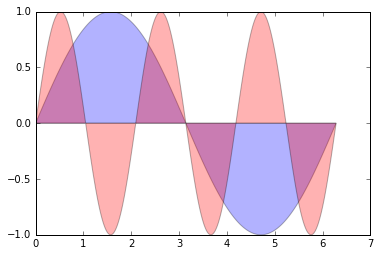

In [82]:
# matplotlib example
import matplotlib.pyplot as plt

# this command makes jupyter displac the plot directly in the notebook
%matplotlib inline

x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)

[top](#top)

<a name="learn"></a>scikit-learn and TensorFlow
---

scikit-learn offers basic functionality for machine learning tasks as well as implementations of cutting edge algorithms. Among others, with scikit-learn you can do
* Classification
* Regression
* Clustering
* Dimensionality reduction
* Model selection
* Preprocessing

TensorFlow does many of the things scikit-learn does but is designed for really big data. Allthough Open Source, development is mainly driven by Google which also uses TensorFlow in its products. TensorFlow especially supports
* working with deep neural nets
* native implementations on GPUs

[top](#top)

<a name="exercise06"></a>Exercise 06: Functions and Libraries
===

0. **Git**
  1. Switch to today's working branch.
  2. Create a new document for the exercise and add it to the working branch's index.
1. **Functions**
  1. Write a function that takes a list as an argument and then sorts its elements manually (do not use **sort()** or **sorted()** for this!).
  2. Test the function by sorting different lists.
  3. (Optional): write a check inside the function that makes sure the variable passed to the function is an iterable that can be sorted and returns without crashing if that is not the case.
  HINT: you can investigate algorithms like bubble sort or quick sort for this task.
  4. Implement two different sorting algorithms in the function (you can use **sort()** as one if you don't have much time). Use default and/or keyword arguments to tell the function, which algorithm to use.
  5. (Optional): find out about the %timeit magic in ipython notebook and use it to test the performance of your sorting algorithm versus **sort()**.
2. **The Python Standard Library**
  1. Inform yourself about the capabilities of the os.path module by reading the documentation.
  2. Use os.path to create a list of all files in the current working directory.
  3. Write a function that creates a new file if the file does not yet exist.
3. **Third party libraries**
  1. Create an array of random (x,y) coordinates using numpy.asarray() and numpy.random
  2. Inform yourself about NumPy's ```loadtxt()``` and ```savetxt()``` functions by reading the function documentation.
  3. Save the array to a text-file.
  4. Read the array from the text-file.
  5. (Optional) Use matplotlib to create a scatter-plot of the random numbers.
  6. (Optional) find out how to save the scatter plot as pdf.
4. **Git**
  1. Commit the document with the exercises to the current working branch with a meaningful commit message.
  2. Merge your working branch with the ```master``` branch.
  3. Push your local commits to the remote repository so you can access it from everywhere.

[top](#top)